# MNIST El Yazısı Rakam Sınıflandırma (CNN)
Bu proje, Keras/TensorFlow kullanarak MNIST veri seti üzerinde basit bir CNN ile el yazısı rakamları sınıflandırmayı hedefliyor.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Eğitim verisi:  (60000, 28, 28)
Test verisi:  (10000, 28, 28)
İlk 5 etiket: [5 0 4 1 9]


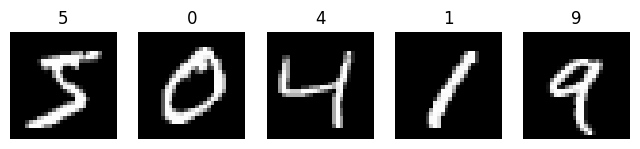

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Eğitim verisi: ", x_train.shape)
print("Test verisi: ", x_test.shape)

print("İlk 5 etiket:", y_train[:5])

plt.figure(figsize=(8,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("Yeni Eğitim Verisi: ", x_train.shape)
print("Yeni Test Verisi: ", x_test.shape)

Yeni Eğitim Verisi:  (60000, 28, 28, 1)
Yeni Test Verisi:  (10000, 28, 28, 1)


In [7]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
    
])

model.summary()

C:\Users\mertc\OneDrive\Masaüstü\Ai-Projects\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)

Epoch 1/5
750/750 - 13s - 18ms/step - accuracy: 0.9227 - loss: 0.2473 - val_accuracy: 0.9764 - val_loss: 0.0817
Epoch 2/5
750/750 - 11s - 14ms/step - accuracy: 0.9729 - loss: 0.0864 - val_accuracy: 0.9839 - val_loss: 0.0533
Epoch 3/5
750/750 - 11s - 14ms/step - accuracy: 0.9803 - loss: 0.0636 - val_accuracy: 0.9871 - val_loss: 0.0438
Epoch 4/5
750/750 - 11s - 14ms/step - accuracy: 0.9831 - loss: 0.0537 - val_accuracy: 0.9879 - val_loss: 0.0431
Epoch 5/5
750/750 - 11s - 14ms/step - accuracy: 0.9854 - loss: 0.0456 - val_accuracy: 0.9893 - val_loss: 0.0363


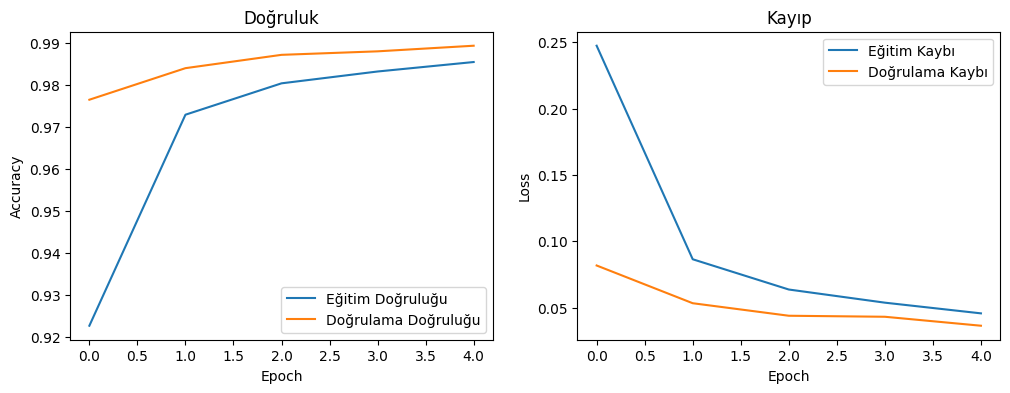

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9897 - loss: 0.0305
Test Doğruluğu: 0.9897, Test Kaybı: 0.0305


In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'],label='Doğrulama Doğruluğu')
plt.title('Doğruluk')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Eğitim Kaybı')
plt.plot(history.history['val_loss'],label='Doğrulama Kaybı')
plt.title('Kayıp')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Doğruluğu: {test_acc:.4f}, Test Kaybı: {test_loss:.4f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


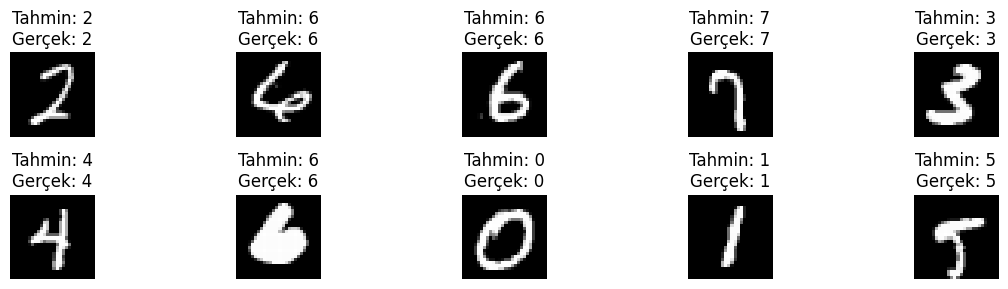

In [10]:
indices = np.random.choice(len(x_test),10, replace=False)
images = x_test[indices]
labels = np.argmax(y_test[indices],axis=1)

predictions = np.argmax(model.predict(images),axis=1)

plt.figure(figsize=(12,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i].reshape(28,28), cmap='gray')
    plt.title(f'Tahmin: {predictions[i]}\nGerçek: {labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()